<a href="https://colab.research.google.com/github/vbddinho/puc_minas_machine/blob/main/plano3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)

In [3]:
#Configurando os plots para serem exibidos diretamente no notebook
%matplotlib inline

In [4]:
df_estatisticas = pd.read_csv('dados/campeonato-brasileiro-estatisticas-full.csv', sep=',',encoding = "UTF-8")


In [5]:
df_estatisticas.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16050 entries, 0 to 16049
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       16050 non-null  int64 
 1   rodata           16050 non-null  int64 
 2   clube            16050 non-null  object
 3   chutes           16050 non-null  int64 
 4   chutes_no_alvo   16050 non-null  int64 
 5   posse_de_bola    6838 non-null   object
 6   passes           16050 non-null  int64 
 7   precisao_passes  6838 non-null   object
 8   faltas           16050 non-null  int64 
 9   cartao_amarelo   16050 non-null  int64 
 10  cartao_vermelho  16050 non-null  int64 
 11  impedimentos     16050 non-null  int64 
 12  escanteios       16050 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.6+ MB


In [6]:
df_estatisticas.nunique()

partida_id         8025
rodata               46
clube                45
chutes               37
chutes_no_alvo       16
posse_de_bola        62
passes              515
precisao_passes      42
faltas               32
cartao_amarelo       11
cartao_vermelho       4
impedimentos         11
escanteios           21
dtype: int64

In [7]:
df_estatisticas.rename(columns={'rodata':'rodada'},inplace=True)

In [8]:
df_estatisticas.isna().sum()

partida_id            0
rodada                0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola      9212
passes                0
precisao_passes    9212
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
dtype: int64

In [9]:
df_estatisticas.tail()

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3
16049,8025,38,Sao Paulo,13,7,65%,591,90%,14,1,0,0,4


In [10]:
df_estatisticas.fillna(0, axis=1, inplace=True)

In [11]:
df_jogos = pd.read_csv('dados/campeonato-brasileiro-full.csv',sep=',',encoding = "UTF-8")

In [12]:
df_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8025 non-null   int64 
 1   rodata              8025 non-null   int64 
 2   data                8025 non-null   object
 3   hora                8025 non-null   object
 4   mandante            8025 non-null   object
 5   visitante           8025 non-null   object
 6   formacao_mandante   3051 non-null   object
 7   formacao_visitante  3051 non-null   object
 8   tecnico_mandante    3415 non-null   object
 9   tecnico_visitante   3415 non-null   object
 10  vencedor            8025 non-null   object
 11  arena               8025 non-null   object
 12  mandante_Placar     8025 non-null   int64 
 13  visitante_Placar    8025 non-null   int64 
 14  mandante_Estado     8025 non-null   object
 15  visitante_Estado    8025 non-null   object
dtypes: int64(4), object(12)


In [13]:
df_jogos.rename(columns={'ID':'partida_id'},inplace=True)
df_jogos.rename(columns={'rodata':'rodada'},inplace=True)

In [14]:
df = pd.merge(df_estatisticas,df_jogos,how='left',right_on='partida_id',left_on='partida_id')

In [15]:
df.tail()

,partida_id,rodada_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,rodada_y,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4,38,13/11/2022,16:03,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,F. J. Monteiro Almeida,A. Stival,Atletico-MG,Neo Química Arena,0,1,SP,MG
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6,38,13/11/2022,16:03,Internacional,Palmeiras,4-2-3-1,4-2-3-1,L. Venker de Menezes,A. Moreira Ferreira,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5,38,13/11/2022,16:03,Internacional,Palmeiras,4-2-3-1,4-2-3-1,L. Venker de Menezes,A. Moreira Ferreira,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3,38,13/11/2022,16:03,Goias,Sao Paulo,4-2-3-1,4-1-2-1-2,J. Ribeiro Ventura,R. Ceni,Sao Paulo,Estádio da Serrinha,0,4,GO,SP
16049,8025,38,Sao Paulo,13,7,65%,591,90%,14,1,0,0,4,38,13/11/2022,16:03,Goias,Sao Paulo,4-2-3-1,4-1-2-1-2,J. Ribeiro Ventura,R. Ceni,Sao Paulo,Estádio da Serrinha,0,4,GO,SP


In [16]:
df.columns

Index(['partida_id', 'rodada_x', 'clube', 'chutes', 'chutes_no_alvo', 'posse_de_bola', 'passes', 'precisao_passes', 'faltas', 'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios', 'rodada_y', 'data', 'hora', 'mandante', 'visitante', 'formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante', 'vencedor', 'arena', 'mandante_Placar', 'visitante_Placar', 'mandante_Estado', 'visitante_Estado'], dtype='object')

In [17]:
df.drop(columns=['rodada_y','hora','arena','visitante_Estado','mandante_Estado','tecnico_mandante','tecnico_visitante'],inplace=True)

In [18]:
#Converte a data do tipo objeto para o tipo datetime e cria a coluna ano
df["data"] = pd.to_datetime(df["data"],format='%d/%m/%Y',dayfirst=True)
df["ano"] = df["data"].dt.year

In [19]:
#temporada de 2020 e 2021 foi afetada pelo COVID-19, realizando ajuste
df.loc[(df["data"]>="2020/08/08") & (df["data"]<="2021/02/25"),"ano" ] = 2020
df.loc[(df["data"]>="2021/05/29") & (df["data"]<="2021/12/09"),"ano" ] = 2021
df.rename(columns={'ano':'temporada'},inplace=True)


In [20]:
#Validando alteração anterior
df[(df["temporada"]==2020)].data.unique()


array(['2020-08-08T00:00:00.000000000', '2020-08-09T00:00:00.000000000',
       '2020-08-12T00:00:00.000000000', '2020-08-13T00:00:00.000000000',
       '2020-08-15T00:00:00.000000000', '2020-08-16T00:00:00.000000000',
       '2020-08-19T00:00:00.000000000', '2020-08-20T00:00:00.000000000',
       '2020-08-22T00:00:00.000000000', '2020-08-23T00:00:00.000000000',
       '2020-08-26T00:00:00.000000000', '2020-08-29T00:00:00.000000000',
       '2020-08-30T00:00:00.000000000', '2020-09-02T00:00:00.000000000',
       '2020-09-03T00:00:00.000000000', '2020-09-05T00:00:00.000000000',
       '2020-09-06T00:00:00.000000000', '2020-09-09T00:00:00.000000000',
       '2020-09-10T00:00:00.000000000', '2020-09-12T00:00:00.000000000',
       '2020-09-13T00:00:00.000000000', '2020-09-16T00:00:00.000000000',
       '2020-09-19T00:00:00.000000000', '2020-09-20T00:00:00.000000000',
       '2020-09-23T00:00:00.000000000', '2020-09-26T00:00:00.000000000',
       '2020-09-27T00:00:00.000000000', '2020-09-28

In [21]:
df.drop(columns=['data'],inplace=True)

In [22]:
df.tail()

,partida_id,rodada_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,mandante,visitante,formacao_mandante,formacao_visitante,vencedor,mandante_Placar,visitante_Placar,temporada
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,Atletico-MG,0,1,2022
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6,Internacional,Palmeiras,4-2-3-1,4-2-3-1,Internacional,3,0,2022
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5,Internacional,Palmeiras,4-2-3-1,4-2-3-1,Internacional,3,0,2022
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3,Goias,Sao Paulo,4-2-3-1,4-1-2-1-2,Sao Paulo,0,4,2022
16049,8025,38,Sao Paulo,13,7,65%,591,90%,14,1,0,0,4,Goias,Sao Paulo,4-2-3-1,4-1-2-1-2,Sao Paulo,0,4,2022


In [23]:
df.vencedor.unique()

array(['Guarani', 'Athletico-PR', '-', 'Criciuma', 'Atletico-MG',
       'Internacional', 'Gremio', 'Flamengo', 'Vitoria', 'Ponte Preta',
       'Parana', 'Sao Caetano', 'Cruzeiro', 'Vasco', 'Paysandu', 'Santos',
       'Corinthians', 'Juventude', 'Bahia', 'Fluminense', 'Sao Paulo',
       'Fortaleza', 'Coritiba', 'Goias', 'Figueirense', 'Palmeiras',
       'Botafogo-RJ', 'Brasiliense', 'Santa Cruz', 'Sport', 'America-RN',
       'Nautico', 'Ipatinga', 'Portuguesa', 'Santo Andre', 'Barueri',
       'Avai', 'Ceara', 'Gremio Prudente', 'Atletico-GO', 'America-MG',
       'Chapecoense', 'Joinville', 'CSA', 'Bragantino', 'Cuiaba'],
      dtype=object)

In [24]:
df.loc[(df['vencedor']==df['clube']),'vencedor'] = 'V'
df.loc[(df['vencedor']=='-'),'vencedor'] = 'E'
df.loc[(df['vencedor']!='V') & (df['vencedor']!='E'),'vencedor'] = 'D'
df.rename(columns={"vencedor":"resultado"},inplace=True)

In [25]:
df.loc[(df['clube'] == df['mandante']),'mv'] = 'm'
df.loc[(df['clube'] == df['visitante']),'mv'] = 'v'
df.drop(columns=['mandante','visitante'],inplace=True)

In [26]:
#Cria coluna de gols, e remove as colunas de mandante_placar e visitante_placar
df['gols'] = df.apply(lambda x: x['mandante_Placar'] if x['mv'] == 'm' else x['visitante_Placar'],axis=1)
df.drop(columns=['mandante_Placar','visitante_Placar'],inplace=True)

In [27]:
df.tail()

,partida_id,rodada_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,formacao_mandante,formacao_visitante,resultado,temporada,mv,gols
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4,4-1-4-1,4-2-3-1,V,2022,v,1
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6,4-2-3-1,4-2-3-1,V,2022,m,3
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5,4-2-3-1,4-2-3-1,D,2022,v,0
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3,4-2-3-1,4-1-2-1-2,D,2022,m,0
16049,8025,38,Sao Paulo,13,7,65%,591,90%,14,1,0,0,4,4-2-3-1,4-1-2-1-2,V,2022,v,4


In [28]:
#Faço um filtro de temporada de analise, apartir de 2018 os dados são completos
df[(df["temporada"]>=2018)].isna().sum()

partida_id            0
rodada_x              0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola         0
passes                0
precisao_passes       0
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
formacao_mandante     0
formacao_visitante    0
resultado             0
temporada             0
mv                    0
gols                  0
dtype: int64

In [29]:
# Filtro para analisar dados de 2018 até o ano de 2022
df2018_2022 = df[(df["temporada"]>=2018)]

In [30]:
df2018_2022.tail(20)

,partida_id,rodada_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,formacao_mandante,formacao_visitante,resultado,temporada,mv,gols
16030,8016,38,Flamengo,17,4,66%,579,91%,14,0,0,1,10,4-3-3,4-5-1,D,2022,m,1
16031,8016,38,Avai,15,8,34%,313,81%,11,1,0,0,3,4-3-3,4-5-1,V,2022,v,2
16032,8017,38,Athletico-PR,25,10,40%,271,75%,19,1,0,2,6,4-1-4-1,4-2-3-1,V,2022,m,3
16033,8017,38,Botafogo-RJ,9,4,60%,415,83%,13,1,0,0,3,4-1-4-1,4-2-3-1,D,2022,v,0
16034,8018,38,Ceara,22,9,62%,467,84%,16,4,0,1,8,4-2-3-1,4-1-2-1-2,V,2022,m,4
16035,8018,38,Juventude,9,4,38%,297,76%,16,4,0,0,3,4-2-3-1,4-1-2-1-2,D,2022,v,1
16036,8019,38,America-MG,36,9,60%,420,82%,14,3,0,0,17,4-3-3,4-2-3-1,E,2022,m,1
16037,8019,38,Atletico-GO,4,3,40%,319,73%,12,2,1,3,5,4-3-3,4-2-3-1,E,2022,v,1
16038,8020,38,Santos,14,3,47%,361,78%,17,1,0,0,5,4-2-3-1,4-4-2,D,2022,m,0
16039,8020,38,Fortaleza,13,6,53%,396,79%,14,3,0,2,7,4-2-3-1,4-4-2,V,2022,v,2


In [31]:
# Resultado de qtd de partidas visitantes ou mandantes que terminaram em derrota empate ou vitoria
df2018_2022.groupby([df2018_2022['resultado'], df2018_2022['mv']]).agg({'partida_id': 'count'})


partida_id
resultado mv            
D         m          464
          v          899
E         m          537
          v          537
V         m          899
          v          464

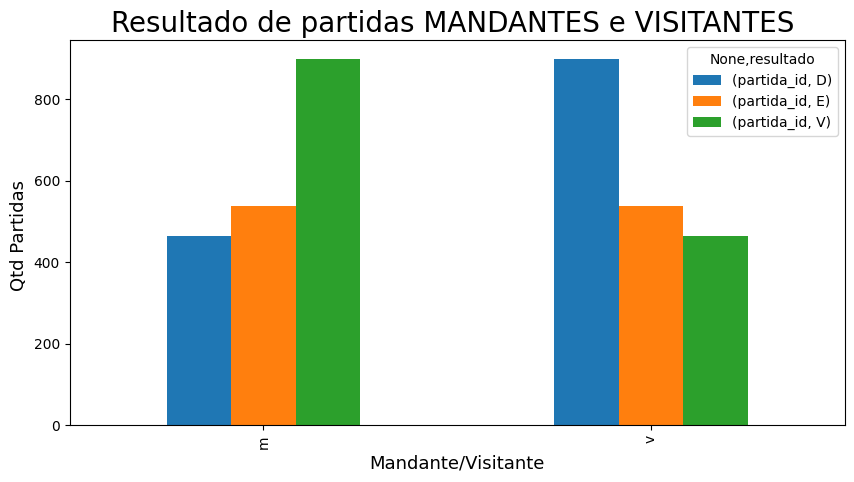

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
df2018_2022.groupby([df2018_2022['mv'], df2018_2022['resultado']]).agg({'partida_id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Resultado de partidas MANDANTES e VISITANTES ", fontsize=20)
ax.set_ylabel("Qtd Partidas ", fontsize=13);
ax.set_xlabel("Mandante/Visitante", fontsize=13);
plt.show()

In [33]:
df2018_2022.tail()

,partida_id,rodada_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,formacao_mandante,formacao_visitante,resultado,temporada,mv,gols
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4,4-1-4-1,4-2-3-1,V,2022,v,1
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6,4-2-3-1,4-2-3-1,V,2022,m,3
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5,4-2-3-1,4-2-3-1,D,2022,v,0
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3,4-2-3-1,4-1-2-1-2,D,2022,m,0
16049,8025,38,Sao Paulo,13,7,65%,591,90%,14,1,0,0,4,4-2-3-1,4-1-2-1-2,V,2022,v,4


In [34]:
#medias de chutes para uma vitoria em Mandantes e VisitantesS
df2018_2022.groupby([df2018_2022['mv'], df2018_2022['resultado']]).agg({'chutes': 'mean'})

chutes
mv resultado         
m  D          14.3427
   E          14.2775
   V          14.7508
v  D          10.8565
   E          11.2868
   V          11.7371

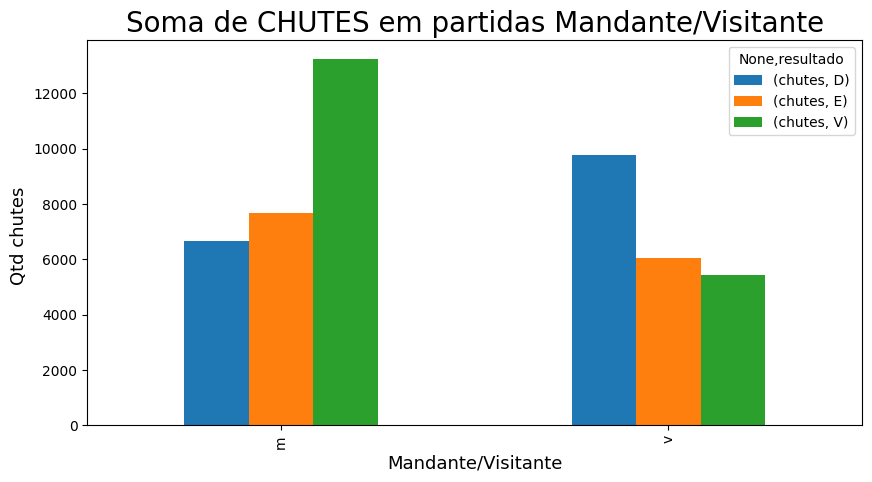

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
df2018_2022.groupby([df2018_2022['mv'], df2018_2022['resultado']]).agg({'chutes': 'sum'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Soma de CHUTES em partidas Mandante/Visitante", fontsize=20)
ax.set_ylabel("Qtd chutes ", fontsize=13);
ax.set_xlabel("Mandante/Visitante", fontsize=13);
plt.show()

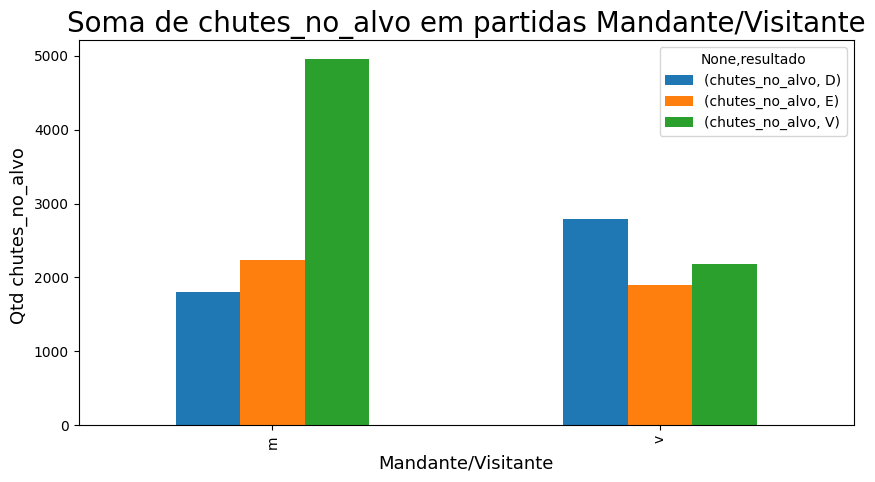

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
df2018_2022.groupby([df2018_2022['mv'], df2018_2022['resultado']]).agg({'chutes_no_alvo': 'sum'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Soma de chutes_no_alvo em partidas Mandante/Visitante", fontsize=20)
ax.set_ylabel("Qtd chutes_no_alvo ", fontsize=13);
ax.set_xlabel("Mandante/Visitante", fontsize=13);
plt.show()

In [37]:
df2018_2022['chutes'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['chutes_no_alvo'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['posse_de_bola'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['passes'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['precisao_passes'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['faltas'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['cartao_amarelo'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['cartao_vermelho'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['impedimentos'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['escanteios'] = df2018_2022['chutes'].astype('Int64')

C:\Users\ADM\AppData\Local\Temp\ipykernel_6768\3546786252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018_2022['chutes'] = df2018_2022['chutes'].astype('Int64')
C:\Users\ADM\AppData\Local\Temp\ipykernel_6768\3546786252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018_2022['chutes_no_alvo'] = df2018_2022['chutes'].astype('Int64')
C:\Users\ADM\AppData\Local\Temp\ipykernel_6768\3546786252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [38]:
df2018_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 12250 to 16049
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   partida_id          3800 non-null   object
 1   rodada_x            3800 non-null   object
 2   clube               3800 non-null   object
 3   chutes              3800 non-null   Int64 
 4   chutes_no_alvo      3800 non-null   Int64 
 5   posse_de_bola       3800 non-null   Int64 
 6   passes              3800 non-null   Int64 
 7   precisao_passes     3800 non-null   Int64 
 8   faltas              3800 non-null   Int64 
 9   cartao_amarelo      3800 non-null   Int64 
 10  cartao_vermelho     3800 non-null   Int64 
 11  impedimentos        3800 non-null   Int64 
 12  escanteios          3800 non-null   Int64 
 13  formacao_mandante   3800 non-null   object
 14  formacao_visitante  3800 non-null   object
 15  resultado           3800 non-null   object
 16  temporada          

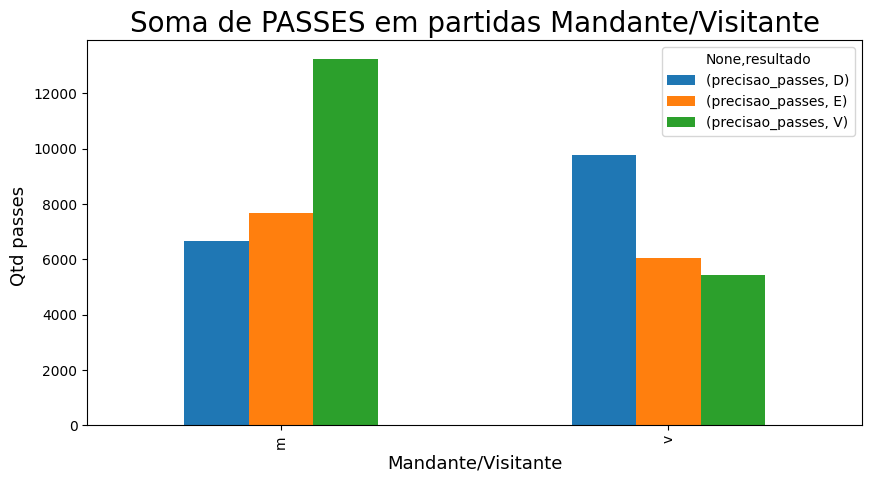

In [80]:
fig, ax = plt.subplots(figsize=(10,5))
df2018_2022.groupby([df2018_2022['mv'], df2018_2022['resultado']]).agg({'passes': 'sum'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Soma de PASSES em partidas Mandante/Visitante", fontsize=20)
ax.set_ylabel("Qtd passes ", fontsize=13);
ax.set_xlabel("Mandante/Visitante", fontsize=13);
plt.show()

In [56]:
def media_chutes_alvo_gol(row):
    if (row['gols'] == 0 ):
        return 0
    else:
        row["chutes_no_alvo"] / row['gols']

df2018_2022['media_chutes_alvo_gol'] = df2018_2022.apply(lambda x : 0 if x['gols'] == 0 else x["chutes_no_alvo"] / x['gols'] ,axis=1)

C:\Users\ADM\AppData\Local\Temp\ipykernel_6768\3889374182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018_2022['media_chutes_alvo_gol'] = df2018_2022.apply(lambda x : 0 if x['gols'] == 0 else x["chutes_no_alvo"] / x['gols'] ,axis=1)


In [60]:
df2018_2022[['temporada','mv','chutes_no_alvo', 'gols','media_chutes_alvo_gol' ]].tail()


,temporada,mv,chutes_no_alvo,gols,media_chutes_alvo_gol
16045,2022,v,17,1,17.00
16046,2022,m,15,3,5.00
16047,2022,v,11,0,0.00
16048,2022,m,6,0,0.00
16049,2022,v,13,4,3.25


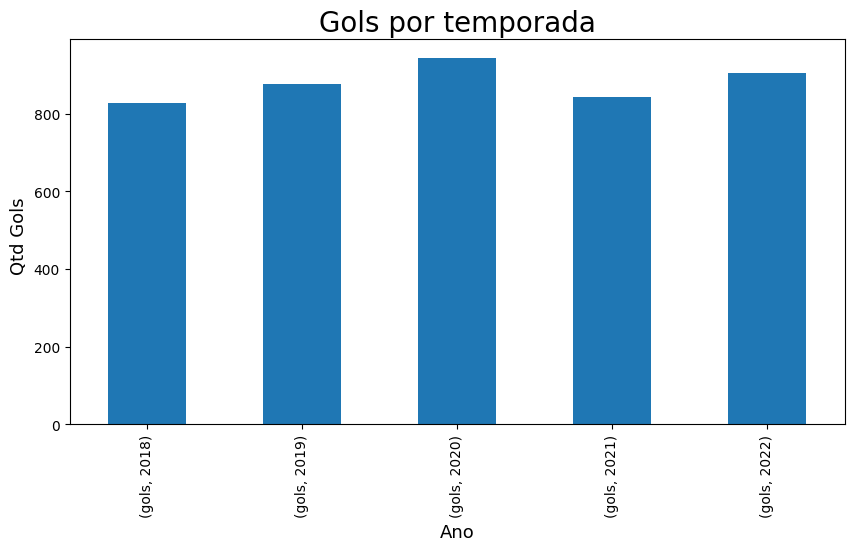

In [77]:
#df2018_2022.groupby([df2018_2022['temporada'],df2018_2022['mv']]).agg({"media_chutes_alvo_gol": "sum",})
fig, ax = plt.subplots(figsize=(10,5))
df2018_2022.groupby("temporada").agg({'gols':'sum'}).unstack().plot(kind="bar", ax=ax)
ax.set_alpha(0.8)
ax.set_title("Gols por temporada", fontsize=20)
ax.set_ylabel("Qtd Gols ", fontsize=13);
ax.set_xlabel("Ano", fontsize=13);
plt.show()